In [1]:
using DataFrames, CSV, SparseArrays, LinearAlgebra
include("../Code/Mixing/Mixing.jl")


Main.Mixing

In [2]:
using Plots

In [3]:
G1test = CSV.read("../Fortran implementation/circut_v1.0612/tests/G1"
, header=0, DataFrame);
G11test = CSV.read("../Fortran implementation/circut_v1.0612/tests/G11"
, header=0, DataFrame);
G14test = CSV.read("../Fortran implementation/circut_v1.0612/tests/G14"
, header=0, DataFrame);
G32test = CSV.read("../Fortran implementation/circut_v1.0612/tests/G32"
, header=0, DataFrame);
G35test = CSV.read("../Fortran implementation/circut_v1.0612/tests/G35"
, header=0, DataFrame);
G48test = CSV.read("../Fortran implementation/circut_v1.0612/tests/G48"
, header=0, DataFrame);
G51test = CSV.read("../Fortran implementation/circut_v1.0612/tests/G51"
, header=0, DataFrame);

In [4]:
function matrixFromFile(readfile)
    M = zeros(readfile[1,1], readfile[1,1])
    for i in 2:nrow(readfile)
        M[readfile[i,1], readfile[i,2]] = readfile[i,3]
        M[readfile[i,2], readfile[i,1]] = readfile[i,3]
    end
    return M
end

matrixFromFile (generic function with 1 method)

In [5]:
function testpipeline(testinput)
    testmat = matrixFromFile(testinput)
    sparsetestmat=sparse(testmat)
    @time V = Mixing.randserial(length(sparsetestmat[1,:]), 20, sparsetestmat)
    a100 = Mixing.assign100(V, sparsetestmat)
    print("Best: ",max(a100...), " Average: ", sum(a100)/100)
end

testpipeline (generic function with 1 method)

In [6]:
V,costs = Mixing.randserial(length(sparse(matrixFromFile(G1test))[1,:]), 20, sparse(matrixFromFile(G1test)), .1, true)

([0.379131400363172 0.08243287627055287 … -0.34579617394255613 0.28191624899764695; 0.0017414495637932367 -0.10653503820307383 … 0.0990376783448019 -0.09584298197283822; … ; 0.01617079307086762 -0.34263992280644306 … -0.25444190193122784 0.2741377795643727; 0.09366894432778368 0.20961817626172663 … 0.26354376697043863 0.32459116256672743], Any[4787.629783371014, 4686.498828783089, 4669.95795085981, 4620.672709316281, 4619.834963111938, 4590.698475411375, 4468.117259409116, 4462.660766072479, 4405.892745168684, 4403.776212586018  …  -9710.026367460083, -9710.028618526181, -9710.028752375943, -9710.042845505348, -9710.070608707678, -9710.084831215896, -9710.093252777375, -9710.112567575687, -9710.120632707663, -9710.12119857172])

In [7]:
Mixing.assign100(V, (sparse(matrixFromFile(G1test))))

100-element Vector{Any}:
 11203.0
 11217.0
 11221.0
 11270.0
 11254.0
 11234.0
 11203.0
 11246.0
 11266.0
 11183.0
 11197.0
 11228.0
 11243.0
     ⋮
 11269.0
 11212.0
 11220.0
 11217.0
 11267.0
 11220.0
 11174.0
 11229.0
 11193.0
 11184.0
 11269.0
 11225.0

In [8]:
costs

8338-element Vector{Any}:
  4787.629783371014
  4686.498828783089
  4669.95795085981
  4620.672709316281
  4619.834963111938
  4590.698475411375
  4468.117259409116
  4462.660766072479
  4405.892745168684
  4403.776212586018
  4304.601157631654
  4191.0350908100645
  4154.621292619598
     ⋮
 -9709.92438767931
 -9710.022662191164
 -9710.026367460083
 -9710.028618526181
 -9710.028752375943
 -9710.042845505348
 -9710.070608707678
 -9710.084831215896
 -9710.093252777375
 -9710.112567575687
 -9710.120632707663
 -9710.12119857172

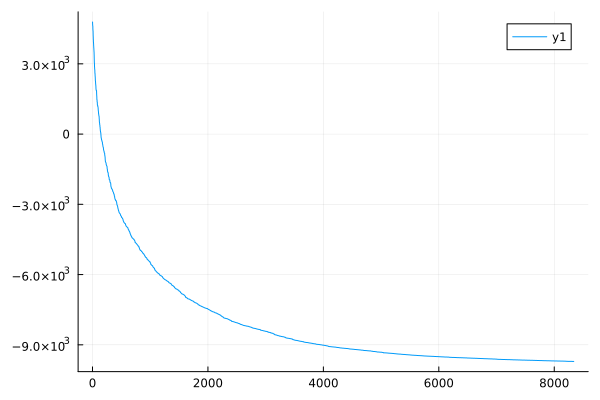

In [25]:
plot(costs[1:end])

In [91]:
testpipeline(G1test)

  2.517450 seconds (1.38 M allocations: 511.915 MiB, 2.74% gc time, 0.15% compilation time)
Best: 11335.0 Average: 11248.6

In [24]:
testpipeline(G11test)

  0.016733 seconds (5.86 k allocations: 4.010 MiB)
Best: 252.0 Average: 233.42

In [25]:
testpipeline(G14test)

  0.005478 seconds (6.43 k allocations: 1.528 MiB)
Best: 2207.0 Average: 2185.57

In [26]:
testpipeline(G32test)

  0.058808 seconds (14.76 k allocations: 25.335 MiB)
Best: 636.0 Average: 610.72

In [27]:
testpipeline(G35test)

  0.042366 seconds (15.91 k allocations: 3.502 MiB)
Best: 5670.0 Average: 5634.68

In [29]:
testpipeline(G48test)

  0.065622 seconds (21.73 k allocations: 36.461 MiB)
Best: 388.0 Average: 359.4

In [30]:
testpipeline(G51test)

  0.013226 seconds (8.01 k allocations: 2.056 MiB)
Best: 2872.0 Average: 2854.05

In [12]:
function testpipelineparallel(testinput)
    testmat = matrixFromFile(testinput)
    sparsetestmat=sparse(testmat)
    @time V = Mixing.randparallel(length(sparsetestmat[1,:]), 2, sparsetestmat)
    a100 = Mixing.assign100(V, sparsetestmat)
    print("Best: ",max(a100...), " Average: ", sum(a100)/100)
end

testpipelineparallel (generic function with 1 method)

In [13]:
testpipelineparallel(G1test)

  0.144200 seconds (233.28 k allocations: 52.938 MiB, 44.50% compilation time)
Best: 11397.0 Average: 11339.07

In [14]:
testpipelineparallel(G11test)

  0.008713 seconds (95.23 k allocations: 6.863 MiB)
Best: 498.0 Average: 485.9

In [15]:
testpipelineparallel(G14test)

  0.042019 seconds (108.52 k allocations: 11.732 MiB)
Best: 3001.0 Average: 2978.04

In [16]:
testpipelineparallel(G32test)

  0.043710 seconds (238.03 k allocations: 17.153 MiB)
Best: 1244.0 Average: 1225.2

In [17]:
testpipelineparallel(G35test)

  0.245711 seconds (270.12 k allocations: 29.747 MiB)
Best: 7445.0 Average: 7414.22

In [18]:
testpipelineparallel(G48test)

  0.099234 seconds (357.04 k allocations: 25.729 MiB)
Best: 5842.0 Average: 5720.38

In [19]:
testpipelineparallel(G51test)

  0.065890 seconds (135.18 k allocations: 14.570 MiB)
Best: 3731.0 Average: 3717.91